In [1]:
data = pd.read_csv('./data/mlb-pitches.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True) 

pd.set_option('max_columns', None)
print(data.shape)
data.head(3)

(709851, 86)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,plate_-x,pfx_-x
0,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019,519293,field_out,hit_into_play,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1,2,2021,8.28,16.56,-0.69,2.83,NaN,NaN,NaN,2,9,Top,77.54,155.31,518595.0,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.174,0.158,0.0,1.0,0.0,0.0,2.0,61,4,4-Seam Fastball,5,0,0,5,0,5,0,5,Infield shift,Strategic,148.0,0.0,-0.073,0.69,-8.28
1,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019,519293,NaN,foul,4.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,1,2021,-9.24,5.76,-0.71,2.62,NaN,NaN,NaN,2,9,Top,NaN,NaN,518595.0,-3.700232,-117.430885,-3.266842,-6.531123,19.793390,-27.369114,3.32,1.51,108.0,75.3,75.0,81.2,2254.0,6.4,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,3,Slider,5,0,0,5,0,5,0,5,Infield shift,Strategic,315.0,0.0,-0.027,0.71,9.24
2,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019,519293,NaN,foul,5.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,0,2021,-7.80,-6.12,-0.04,2.46,NaN,NaN,NaN,2,9,Top,NaN,NaN,518595.0,-1.977183,-109.901781,-1.155694,-4.872924,20.602334,-36.262184,3.32,1.51,157.0,83.5,65.0,75.2,1940.0,6.2,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,2,Curveball,5,0,0,5,0,5,0,5,Infield shift,Standard,328.0,0.0,-0.020,0.04,7.80


In [2]:
pitch_data = data[['pitch_type', 'player_name','release_speed', 
                   'release_spin_rate', 'spin_axis', 'pfx_-x', 
                   'pfx_z','release_extension', 'release_pos_z', 
                   'plate_-x', 'plate_x', 'plate_z', 'zone', 'pitch_name']].copy()

# Drop pitch types Fasball, knuckleball, eephus, and screwball
pitch_values = ['SC', 'EP', 'KN', 'FA', 'CS']
pitch_data = pitch_data[pitch_data.pitch_type.isin(pitch_values) == False]

pitch_data.dropna(inplace = True)
print(pitch_data.shape)
pitch_data.groupby(['pitch_name']).mean()

(705451, 14)


,release_speed,release_spin_rate,spin_axis,pfx_-x,pfx_z,release_extension,release_pos_z,plate_-x,plate_x,plate_z,zone
pitch_name,,,,,,,,,,,
4-Seam Fastball,93.701048,2273.321923,192.844589,2.841928,16.101692,6.367587,5.916424,-0.001870,0.001870,2.743501,8.034263
Changeup,84.807465,1749.751494,195.016083,3.596171,6.830083,6.306842,5.796710,0.040469,-0.040469,1.850578,10.337325
Curveball,78.738139,2506.901664,124.681467,-3.895091,-8.713166,6.207393,5.970392,-0.069980,0.069980,1.834989,9.950110
Cutter,88.527775,2371.309926,174.077882,-1.365290,7.946324,6.258930,5.897105,-0.158992,0.158992,2.330434,9.014211
Knuckle Curve,81.065056,2536.118821,77.332553,-6.285540,-11.293460,6.265553,5.978711,-0.104382,0.104382,1.795782,10.018865
Sinker,93.006557,2123.462608,194.735729,5.646206,9.230408,6.307073,5.730813,0.076360,-0.076360,2.335259,8.741794
Slider,84.673628,2416.437979,146.027200,-3.204771,1.715861,6.259218,5.799698,-0.231580,0.231580,1.885450,10.004718
Split-Finger,85.705460,1364.779008,227.122671,9.603752,3.877842,6.281286,5.934464,0.222921,-0.222921,1.686196,10.548607


In [3]:
stro = data.loc[data['player_name'] == 'Stroman, Marcus'].copy()

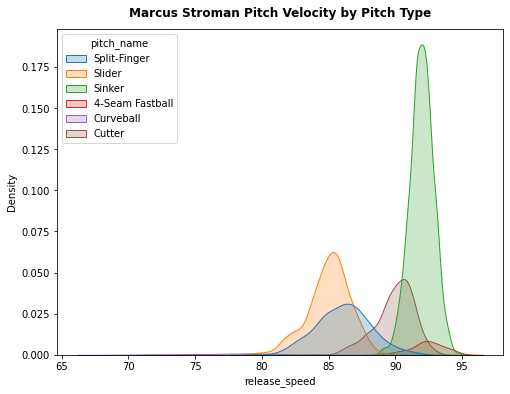

In [5]:
plt.figure(figsize = (8, 6))

ax = sns.kdeplot(data = stro, x = 'release_speed', hue = 'pitch_name', fill = True, palette = 'tab10')
sns.move_legend(ax, 'upper left')
plt.title('Marcus Stroman Pitch Velocity by Pitch Type', fontsize = 12, fontweight = 'bold', pad = 12);